In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os

main_folder = './3-month-V2X'

summary_dfs_list = []
host_dfs_list = []

for folder_name in os.listdir(main_folder):
    
    folder_path = os.path.join(main_folder, folder_name)
    
    if os.path.isdir(folder_path):
        
        for file_name in os.listdir(folder_path):
            
            if file_name.endswith('.csv') and 'summary' in file_name:
                
                file_path = os.path.join(folder_path, file_name)
                df = pd.read_csv(file_path)
                summary_dfs_list.append(df)
                
            else:
                  file_path = os.path.join(folder_path, file_name)
                  df = pd.read_csv(file_path)
                  host_dfs_list.append(df)


In [3]:
summary_dfs_list[0].shape

(6193, 43)

In [4]:
summary_df = pd.concat(summary_dfs_list)

In [5]:
summary_df.shape

# we have data regarding 18k+ trips

(18680, 43)

In [6]:
host_dfs_list[0].shape

(11014763, 44)

In [7]:
host_df = pd.concat(host_dfs_list)

In [8]:
host_df.shape

(36652356, 44)

# Summary dataset

In [9]:
summary_df.head()

,uuid,segmentid,partitionDate,device,timestamp,filedate,filetimeutc,updateTimeMs,sequenceNo,vin,...,numSPATRx,numWarnings,numInforms,numGNSSOutages,numCANOutages,numIntersectionEncounters,timestamp_hr,updateTimeMs_hr,startlocaltime_hr,endlocaltime_hr
0,1643674369728110428,82906c5c224aa516c6d93297cb2d5ea6,2022-02-01,10428,1643674369728,20220201,1249,1668804806655171,1,4342309e4ba71c9a7d478ed061abd025,...,0,0,0,0,0,0,2022-02-01 00:12:17.280,2022-11-18 20:53:26.655170898,2022-02-01 05:12:49.728,2022-02-01 05:13:10.930
1,1643674654963103053,e573dd2f4be814fd569c4072f6bd313b,2022-02-01,3053,1643674654963,20220201,1734,1668804326987669,1,177540c7bcb8db31697b601642eac8d4,...,0,0,0,0,50,0,2022-02-01 00:16:39.424,2022-11-18 20:45:26.987668945,2022-02-01 05:17:34.963,2022-02-01 05:24:18.763
2,1643674742010110411,34ee96170b98c727f54ac1506390cfaf,2022-02-01,10411,1643674742010,20220201,1902,1668804687925360,1,2d5b53f80151aea5fef0722f8b1edf99,...,0,0,0,0,0,0,2022-02-01 00:18:50.496,2022-11-18 20:51:27.925360107,2022-02-01 05:19:02.010,2022-02-01 05:30:43.439
3,1643675054902100146,ed65cba540ebcef63cbf825023c6a05d,2022-02-01,146,1643675054902,20220201,2414,1668804287157165,1,a5e00132373a7031000fd987a3c9f87b,...,375,0,0,0,5,0,2022-02-01 00:23:12.640,2022-11-18 20:44:47.157165039,2022-02-01 05:24:14.902,2022-02-01 05:55:45.762
4,1643676306189110049,76acc7e85e0a55ed17f7062844d95863,2022-02-01,10049,1643676306189,20220201,4506,1668804649764633,1,1759e864edd6cb2200926b3a2f729dac,...,0,0,0,0,0,0,2022-02-01 00:45:03.360,2022-11-18 20:50:49.764633057,2022-02-01 05:45:06.189,2022-02-01 05:50:22.752


In [10]:
summary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18680 entries, 0 to 6776
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   uuid                       18680 non-null  int64  
 1   segmentid                  18680 non-null  object 
 2   partitionDate              18680 non-null  object 
 3   device                     18680 non-null  int64  
 4   timestamp                  18680 non-null  int64  
 5   filedate                   18680 non-null  int64  
 6   filetimeutc                18680 non-null  int64  
 7   updateTimeMs               18680 non-null  int64  
 8   sequenceNo                 18680 non-null  int64  
 9   vin                        18680 non-null  object 
 10  tripId                     18680 non-null  int64  
 11  utctime                    18680 non-null  int64  
 12  startlocaltime             18680 non-null  int64  
 13  endlocaltime               18680 non-null  int6

In [11]:
safety_msgs = ['numBSMTx', 'numWarnings', 'numInforms', 'numNormalBSMRx']

summary_df[safety_msgs].describe()

,numBSMTx,numWarnings,numInforms,numNormalBSMRx
count,18680.000000,18680.000000,18680.000000,18680.000000
mean,12175.680460,0.277302,0.346092,236.131745
std,13265.830253,8.343474,8.432338,1429.421393
min,0.000000,0.000000,0.000000,0.000000
25%,3212.000000,0.000000,0.000000,0.000000
50%,8220.500000,0.000000,0.000000,0.000000
75%,17806.000000,0.000000,0.000000,58.000000
max,340200.000000,255.000000,255.000000,115637.000000


In [12]:
for each in safety_msgs:
    print('No.of values equal to zero in column {} is {}'.format(each, summary_df[each].value_counts()[0]))

No.of values equal to zero in column numBSMTx is 588
No.of values equal to zero in column numWarnings is 18645
No.of values equal to zero in column numInforms is 18509
No.of values equal to zero in column numNormalBSMRx is 12745


In [13]:
summary_df[safety_msgs].corr()

# no.of informs and no.of warnings are extremely positively correlated - we might delete one later on

,numBSMTx,numWarnings,numInforms,numNormalBSMRx
numBSMTx,1.000000,-0.006959,-0.002720,0.138333
numWarnings,-0.006959,1.000000,0.988275,0.009561
numInforms,-0.002720,0.988275,1.000000,0.017863
numNormalBSMRx,0.138333,0.009561,0.017863,1.000000


In [14]:
# No.of distinct values in each column

summary_df.nunique()

uuid                         18680
segmentid                    18680
partitionDate                   90
device                         157
timestamp                    18680
filedate                        90
filetimeutc                  16019
updateTimeMs                 18680
sequenceNo                       1
vin                            157
tripId                       18680
utctime                      18680
startlocaltime               18677
endlocaltime                 18676
swversionmaj                     0
swversionmin                     0
startlatitude                 6585
startlongitude                6585
endlatitude                  17344
endlongitude                 17345
numBSMTx                     13185
firmwareVersionString           16
configsVersionString            10
fullMediaVersionString          13
deltaMediaVersionString          3
pluginsVersionString             6
totalStorageOnDevice             5
storageUsed                    228
configVersion       

In [15]:
# partitionDate - 90 days data - jan / feb / march 2022 - same is represented in file date

# device - data of 157 employees / cars - also represented by vin

# Almost 10,000 null values in start latitude and longitude 

# 12,000+ null values in start odometer, 1000+ nulls in end odometer 

In [16]:
summary_df[['startodometer']].value_counts() 

# whole column is almost null / zero

startodometer
0.0              6147
51132855.0          8
51097855.0          5
51092854.0          3
51605853.0          2
                 ... 
6921980.0           1
7038979.0           1
7047979.0           1
7170979.0           1
75449788.0          1
Length: 63, dtype: int64

Text(0.5, 0, 'odometer values at the end of each trip')

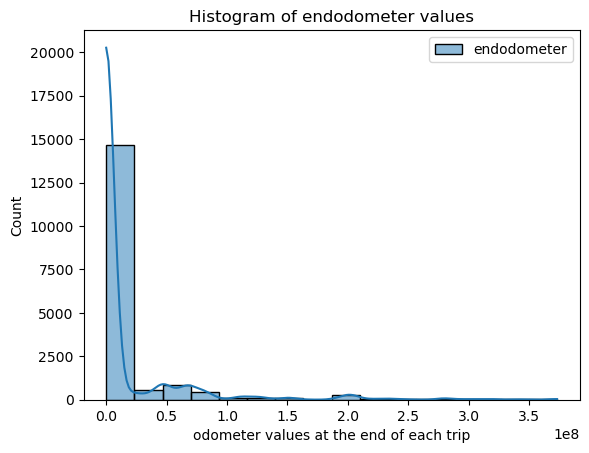

In [17]:
sns.histplot(summary_df[['endodometer']], kde = True)

plt.title('Histogram of endodometer values')
plt.xlabel('odometer values at the end of each trip')

# nothing much useful about this column as well

In [18]:
summary_df[['endlocaltime_hr', 'startlocaltime_hr']].head() 

# They are of object data type

,endlocaltime_hr,startlocaltime_hr
0,2022-02-01 05:13:10.930,2022-02-01 05:12:49.728
1,2022-02-01 05:24:18.763,2022-02-01 05:17:34.963
2,2022-02-01 05:30:43.439,2022-02-01 05:19:02.010
3,2022-02-01 05:55:45.762,2022-02-01 05:24:14.902
4,2022-02-01 05:50:22.752,2022-02-01 05:45:06.189


In [19]:
# Calculating the trip duration in mintues as int data type

#for now, just leaving out the date in the columns endlocaltime_hr, startlocaltime_hr

summary_df['startlocaltime_hr'] = pd.to_datetime(summary_df['startlocaltime_hr'])
summary_df['endlocaltime_hr'] = pd.to_datetime(summary_df['endlocaltime_hr'])

summary_df['trip_duration_min'] = ((summary_df['endlocaltime_hr'] - summary_df['startlocaltime_hr']).astype('timedelta64[m]')).astype(int)


Text(0.5, 0, 'values for the duration of each trip')

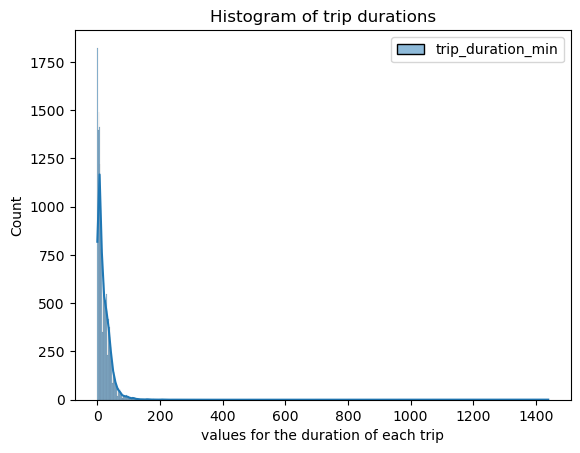

In [20]:
sns.histplot(summary_df[['trip_duration_min']], kde = True)

plt.title('Histogram of trip durations')
plt.xlabel('values for the duration of each trip')

In [21]:
summary_df['trip_duration_min'].describe()

# Most of the trips are around 20 min

count    18680.000000
mean        20.637580
std         26.640382
min          0.000000
25%          5.000000
50%         14.000000
75%         30.000000
max       1439.000000
Name: trip_duration_min, dtype: float64

# Host dataset

In [22]:
host_df.head()

,uuid,segmentid,partitionDate,device,timestamp,filedate,filetimeutc,updateTimeMs,sequenceNo,vin,...,headlamp,wiper,stabilitycontrolstatus,absstatus,traccontrolstatus,closestintersectid,gpsUncertainFlag,speedMph,timestamp_hr,updateTimeMs_hr
0,1643674370327110428,82906c5c224aa516c6d93297cb2d5ea6,2022-02-01,10428,1643674370327,20220201,1249,1678891735000,1,4342309e4ba71c9a7d478ed061abd025,...,0.0,0.0,0.0,0.0,0,0,False,0.0,2022-02-01 00:12:17.280,1970-01-20 10:21:31.735
1,1643674370827210428,82906c5c224aa516c6d93297cb2d5ea6,2022-02-01,10428,1643674370827,20220201,1249,1678891735000,2,4342309e4ba71c9a7d478ed061abd025,...,0.0,0.0,0.0,0.0,0,0,False,0.0,2022-02-01 00:12:17.280,1970-01-20 10:21:31.735
2,1643674371327310428,82906c5c224aa516c6d93297cb2d5ea6,2022-02-01,10428,1643674371327,20220201,1249,1678891735000,3,4342309e4ba71c9a7d478ed061abd025,...,0.0,0.0,0.0,0.0,0,0,False,0.0,2022-02-01 00:12:17.280,1970-01-20 10:21:31.735
3,1643674371827410428,82906c5c224aa516c6d93297cb2d5ea6,2022-02-01,10428,1643674371827,20220201,1249,1678891735000,4,4342309e4ba71c9a7d478ed061abd025,...,0.0,0.0,0.0,0.0,0,0,False,0.0,2022-02-01 00:12:17.280,1970-01-20 10:21:31.735
4,1643674372327510428,82906c5c224aa516c6d93297cb2d5ea6,2022-02-01,10428,1643674372327,20220201,1249,1678891735000,5,4342309e4ba71c9a7d478ed061abd025,...,0.0,0.0,0.0,0.0,0,0,False,0.0,2022-02-01 00:12:17.280,1970-01-20 10:21:31.735


In [23]:
host_df.shape

# since the dataset is huge, let's just focus on useful columns for now 

# might have to sample the data as well - we will start with considering the data of february month

(36652356, 44)

In [24]:
host_dfs_list[0]

,uuid,segmentid,partitionDate,device,timestamp,filedate,filetimeutc,updateTimeMs,sequenceNo,vin,...,headlamp,wiper,stabilitycontrolstatus,absstatus,traccontrolstatus,closestintersectid,gpsUncertainFlag,speedMph,timestamp_hr,updateTimeMs_hr
0,1643674370327110428,82906c5c224aa516c6d93297cb2d5ea6,2022-02-01,10428,1643674370327,20220201,1249,1678891735000,1,4342309e4ba71c9a7d478ed061abd025,...,0.0,0.0,0.0,0.0,0,0,False,0.000000,2022-02-01 00:12:17.280,1970-01-20 10:21:31.735
1,1643674370827210428,82906c5c224aa516c6d93297cb2d5ea6,2022-02-01,10428,1643674370827,20220201,1249,1678891735000,2,4342309e4ba71c9a7d478ed061abd025,...,0.0,0.0,0.0,0.0,0,0,False,0.000000,2022-02-01 00:12:17.280,1970-01-20 10:21:31.735
2,1643674371327310428,82906c5c224aa516c6d93297cb2d5ea6,2022-02-01,10428,1643674371327,20220201,1249,1678891735000,3,4342309e4ba71c9a7d478ed061abd025,...,0.0,0.0,0.0,0.0,0,0,False,0.000000,2022-02-01 00:12:17.280,1970-01-20 10:21:31.735
3,1643674371827410428,82906c5c224aa516c6d93297cb2d5ea6,2022-02-01,10428,1643674371827,20220201,1249,1678891735000,4,4342309e4ba71c9a7d478ed061abd025,...,0.0,0.0,0.0,0.0,0,0,False,0.000000,2022-02-01 00:12:17.280,1970-01-20 10:21:31.735
4,1643674372327510428,82906c5c224aa516c6d93297cb2d5ea6,2022-02-01,10428,1643674372327,20220201,1249,1678891735000,5,4342309e4ba71c9a7d478ed061abd025,...,0.0,0.0,0.0,0.0,0,0,False,0.000000,2022-02-01 00:12:17.280,1970-01-20 10:21:31.735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11014758,1646092799713132910427,9db8ae1d4c7d0a41872ddc45c113de60,2022-02-28,10427,1646092799713,20220228,234854,1678894940000,1329,4c6515356f214aa275e07ddbbd922a5e,...,0.0,0.0,0.0,0.0,0,0,False,42.714298,2022-02-28 23:59:06.752,1970-01-20 10:21:34.940
11014759,1646092799735151110423,b2ef61d2645e4ec6e5163e1e23637b5c,2022-02-28,10423,1646092799735,20220228,234705,1678894940000,1511,99e314b1b43706773153e7ef375fc68c,...,0.0,0.0,0.0,0.0,0,0,False,72.270938,2022-02-28 23:59:06.752,1970-01-20 10:21:34.940
11014760,164609279977316910009,cf98c3a85529a6ae179f6f8d942c3d96,2022-02-28,10009,1646092799773,20220228,235835,1678894940000,169,483d8df877b31405c1e8fe4247f02d86,...,0.0,0.0,0.0,0.0,0,0,False,9.600931,2022-02-28 23:59:06.752,1970-01-20 10:21:34.940
11014761,164609279978769010421,fdb47de2de6f7b0597a9b984f7ee521a,2022-02-28,10421,1646092799787,20220228,235414,1678894940000,690,8493eeaccb772c0878f99d60a0bd2bb3,...,0.0,0.0,0.0,0.0,0,0,False,0.000000,2022-02-28 23:59:06.752,1970-01-20 10:21:34.940


In [25]:
host_df_feb = pd.DataFrame(host_dfs_list[0])

In [26]:
host_df_feb.head()

,uuid,segmentid,partitionDate,device,timestamp,filedate,filetimeutc,updateTimeMs,sequenceNo,vin,...,headlamp,wiper,stabilitycontrolstatus,absstatus,traccontrolstatus,closestintersectid,gpsUncertainFlag,speedMph,timestamp_hr,updateTimeMs_hr
0,1643674370327110428,82906c5c224aa516c6d93297cb2d5ea6,2022-02-01,10428,1643674370327,20220201,1249,1678891735000,1,4342309e4ba71c9a7d478ed061abd025,...,0.0,0.0,0.0,0.0,0,0,False,0.0,2022-02-01 00:12:17.280,1970-01-20 10:21:31.735
1,1643674370827210428,82906c5c224aa516c6d93297cb2d5ea6,2022-02-01,10428,1643674370827,20220201,1249,1678891735000,2,4342309e4ba71c9a7d478ed061abd025,...,0.0,0.0,0.0,0.0,0,0,False,0.0,2022-02-01 00:12:17.280,1970-01-20 10:21:31.735
2,1643674371327310428,82906c5c224aa516c6d93297cb2d5ea6,2022-02-01,10428,1643674371327,20220201,1249,1678891735000,3,4342309e4ba71c9a7d478ed061abd025,...,0.0,0.0,0.0,0.0,0,0,False,0.0,2022-02-01 00:12:17.280,1970-01-20 10:21:31.735
3,1643674371827410428,82906c5c224aa516c6d93297cb2d5ea6,2022-02-01,10428,1643674371827,20220201,1249,1678891735000,4,4342309e4ba71c9a7d478ed061abd025,...,0.0,0.0,0.0,0.0,0,0,False,0.0,2022-02-01 00:12:17.280,1970-01-20 10:21:31.735
4,1643674372327510428,82906c5c224aa516c6d93297cb2d5ea6,2022-02-01,10428,1643674372327,20220201,1249,1678891735000,5,4342309e4ba71c9a7d478ed061abd025,...,0.0,0.0,0.0,0.0,0,0,False,0.0,2022-02-01 00:12:17.280,1970-01-20 10:21:31.735


In [27]:
host_df_feb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11014763 entries, 0 to 11014762
Data columns (total 44 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   uuid                    object 
 1   segmentid               object 
 2   partitionDate           object 
 3   device                  int64  
 4   timestamp               int64  
 5   filedate                int64  
 6   filetimeutc             int64  
 7   updateTimeMs            int64  
 8   sequenceNo              int64  
 9   vin                     object 
 10  tripId                  int64  
 11  localTimeMs             int64  
 12  latitude                float64
 13  longitude               float64
 14  elevation               float64
 15  heading                 float64
 16  gpsspeed                float64
 17  fixtypehvgps            float64
 18  gpssemimajaxis          float64
 19  gpssemiminaxis          float64
 20  gpsorientsemimaj        float64
 21  brakestatus             float

In [28]:
host_df_feb.loc[0,:]

uuid                                   1643674370327110428
segmentid                 82906c5c224aa516c6d93297cb2d5ea6
partitionDate                                   2022-02-01
device                                               10428
timestamp                                    1643674370327
filedate                                          20220201
filetimeutc                                           1249
updateTimeMs                                 1678891735000
sequenceNo                                               1
vin                       4342309e4ba71c9a7d478ed061abd025
tripId                                   10428202202011249
localTimeMs                                         770327
latitude                                         27.994724
longitude                                       -82.467935
elevation                                          -20.137
heading                                           84.50086
gpsspeed                                             0.0

In [29]:
# few important columns that needs to be considered are 

# throttlepospct, elevation, brakestatus, transstate, yawrate, steerangle, turnsignal, speedMph

Text(0.5, 1.0, 'Distribution of throttle position values')

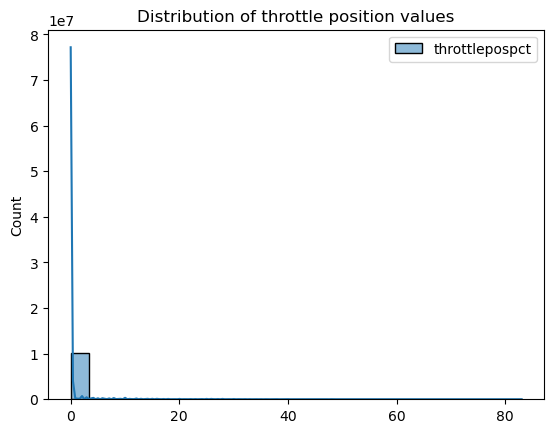

In [30]:
# Throttle position - when you press the gas pedal halfway down, you're increasing the throttle position by 50% 

sns.histplot(host_df_feb[['throttlepospct']], kde = True)

plt.title('Distribution of throttle position values')


In [31]:
host_df_feb['throttlepospct'].value_counts()

0.0     9988511
2.0      103896
4.0       65822
3.0       62255
1.0       50198
         ...   
69.0         27
78.0         26
75.0         26
79.0         24
71.0         18
Name: throttlepospct, Length: 84, dtype: int64

In [32]:
host_df_feb['throttlepospct'].describe()

count    1.077065e+07
mean     8.518260e-01
std      4.370090e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.300000e+01
Name: throttlepospct, dtype: float64

In [33]:
# elevation - It expalins the load on the engine - Higher elevation, car needs extra effort

host_df_feb['elevation'].value_counts()

 1000.000    231955
 251.717      20224
-14.260        9703
-16.222        9696
-7.833         9148
              ...  
 319.638          1
 289.367          1
 319.655          1
 289.312          1
-35.820           1
Name: elevation, Length: 190799, dtype: int64

In [34]:
host_df_feb['elevation'].describe()

count    1.101476e+07
mean     5.662870e+01
std      1.749313e+02
min     -1.382070e+02
25%     -1.859000e+01
50%     -1.364900e+01
75%     -2.502000e+00
max      1.000000e+03
Name: elevation, dtype: float64

Text(0.5, 1.0, 'Histogram of elevation values')

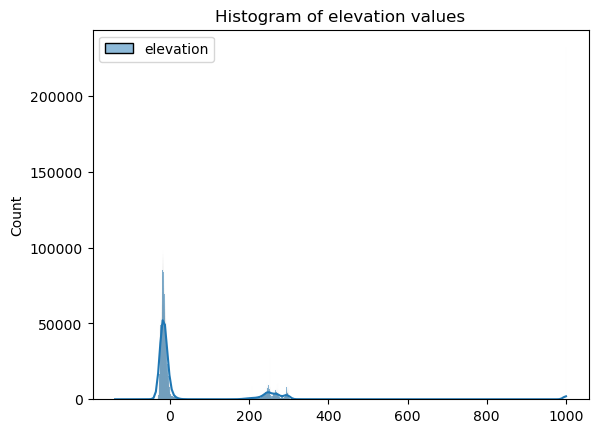

In [35]:
sns.histplot(host_df_feb[['elevation']], kde = True)

plt.title('Histogram of elevation values')

# There is also a column elevation in Ft, let's consider elevation for now


In [36]:
## Is there any relation between throttlepospct and elevation values?

host_df_feb[['elevation', 'throttlepospct']].corr()

# scatter plot of the two columns was not informative

,elevation,throttlepospct
elevation,1.000000,0.384221
throttlepospct,0.384221,1.000000


In [37]:
# brake status - whether the driver pressed the brake or not - this column seems to be not so useful

host_df_feb['brakestatus'].value_counts()

0.0    7217412
1.0    3553240
Name: brakestatus, dtype: int64

Text(0.5, 1.0, 'Break Usage')

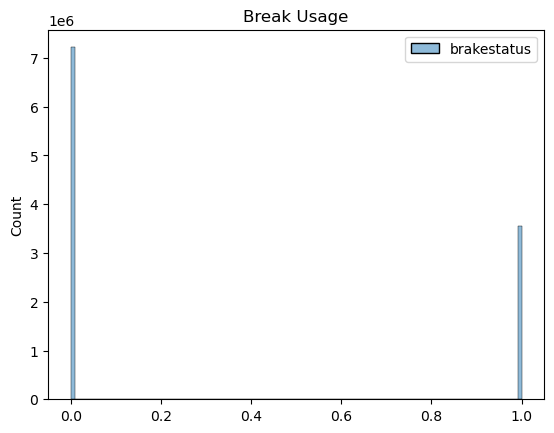

In [38]:
sns.histplot(host_df_feb[['brakestatus']])

plt.title('Break Usage')

In [39]:
# transstate - current Gear position

host_df_feb['transstate'].value_counts()

# no use of this column - we could drop it later on

2.0    10770652
Name: transstate, dtype: int64

In [40]:
# yawrate - more or less describe's the car condition especially in cases of turnings, change in directions

# Higher yaw rates during turns indicate that the vehicle is responding to the driver's steering inputs and 
# negotiating the turn effectively 

host_df_feb['yawrate'].describe()

# unable to draw the plot for this column - taking too much of time

count    1.077065e+07
mean     1.646134e-02
std      8.721109e+00
min     -1.579636e+03
25%     -1.726530e-01
50%      0.000000e+00
75%      2.227374e-01
max      1.505285e+03
Name: yawrate, dtype: float64

In [41]:
# steering angle - in between -/+ 595 degrees

host_df_feb['steerangle'].describe()


count    1.077065e+07
mean     5.242979e-02
std      2.590184e+01
min     -5.943000e+02
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.952000e+02
Name: steerangle, dtype: float64

Text(0.5, 1.0, 'Looking at the distribution of steering angles')

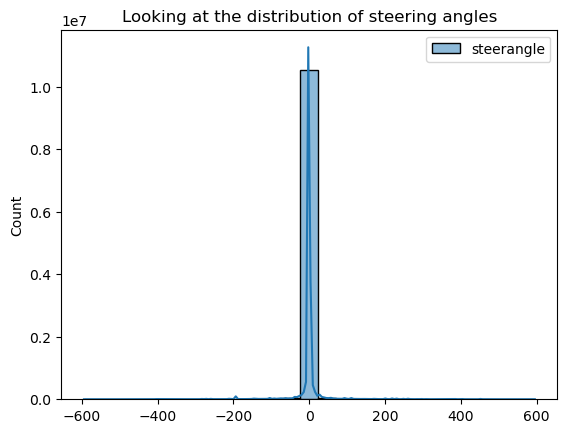

In [42]:
sns.histplot(host_df_feb[['steerangle']], kde = True)

plt.title('Looking at the distribution of steering angles')


In [43]:
host_df_feb['steerangle'].value_counts()

 0.00000      9238470
 0.30000        31958
-0.30000        28802
 0.10000        25801
 0.70000        25673
               ...   
-472.90000          1
-566.60004          1
-483.20000          1
-483.10000          1
 484.90000          1
Name: steerangle, Length: 9930, dtype: int64

In [44]:
## Is there any relation between steerangle and yawrate values?

host_df_feb[['steerangle', 'yawrate']].corr() 

# It seems that not much correlation is there 


,steerangle,yawrate
steerangle,1.000000,0.087003
yawrate,0.087003,1.000000


<Axes: xlabel='steerangle', ylabel='yawrate'>

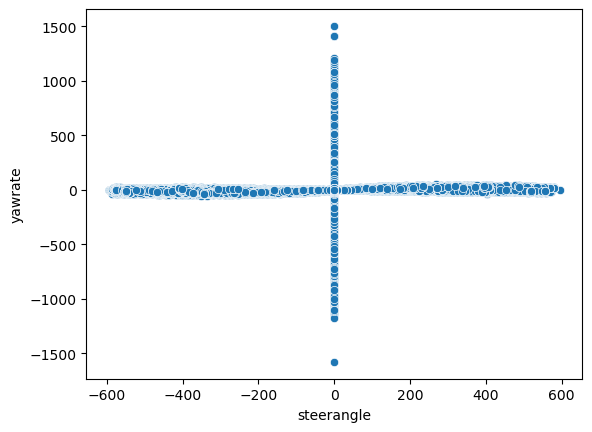

In [45]:
sns.scatterplot(data = host_df_feb, x = 'steerangle', y = 'yawrate')

# Theoretically, yawrates are supposed to be higher on turnings but that's not the case - why? 

In [46]:
# turnsignal - if the turn indicator is on or not - 1 (left), 2(right)

host_df_feb['turnsignal'].value_counts()

0.0    10606422
1.0       94740
2.0       69490
Name: turnsignal, dtype: int64

In [47]:
# speedMph

host_df_feb['speedMph'].describe()

# This column seems to be having lots of incorrect values - same as 'gpsspeedMph' column

# max value of speed is 2236

count    1.101476e+07
mean     7.697459e+01
std      3.262525e+02
min      0.000000e+00
25%      0.000000e+00
50%      2.425286e+01
75%      5.054134e+01
max      2.236936e+03
Name: speedMph, dtype: float64

In [48]:
host_df_feb['gpsspeed'].describe()

# This one looks correct - but not sure of the dimensions 

count    1.078281e+07
mean     1.253743e+01
std      1.197087e+01
min      0.000000e+00
25%      3.700000e-02
50%      1.028500e+01
75%      2.163300e+01
max      4.990015e+01
Name: gpsspeed, dtype: float64

# Future work


In [49]:
# for each trip - might draw some time series visualizations and then look at how different columns are 

In [50]:
# feature engineering

In [51]:
# spat table? 